# Programming Assignment 1
---

In [43]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.datasets import load_iris
import string

## Question 1

The following should be noted regarding scaling the rows or columns of a matrix

- the multiplication by a diagonal matrix $D_1$ from the left scales the rows of a matrix by the respective diagonal entries in $D_1$. For example
$$
\begin{bmatrix}d_{11} & 0 & 0\\ 0 & d_{22} & 0 \\0 & 0 & d_{33} \end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & a_{13}& a_{14}\\ 
a_{21} & a_{22} & a_{23}& a_{24} \\
a_{31} & a_{32} & a_{33}& a_{34} 
\end{bmatrix}=
\begin{bmatrix}d_{11}\,a_{11} & d_{11}\,a_{12} & d_{11}\,a_{13}& d_{11}\,a_{14}\\ 
d_{22}\,a_{21} & d_{22}\,a_{22} & d_{22}\,a_{23}& d_{11}\,a_{24} \\
d_{33}\,a_{31} &d_{33}\, a_{32} & d_{33}\,a_{33} &d_{11}\, a_{34}
\end{bmatrix}.
$$

- the multiplication by a diagonal matrix $D_2$ from the right scales the columns of a matrix by the respective diagonal entries in $D_2$.
$$
\begin{bmatrix}
a_{11} & a_{12} & a_{13}& a_{14}\\ 
a_{21} & a_{22} & a_{23}& a_{24} \\
a_{31} & a_{32} & a_{33}& a_{34} 
\end{bmatrix}
\begin{bmatrix}
d_{11} & 0 & 0 & 0\\ 
0 & d_{22} & 0& 0 \\
0 & 0 & d_{33} & 0\\
0 & 0 & 0 & d_{44} 
\end{bmatrix}=
\begin{bmatrix}
d_{11}\,a_{11} & d_{22}\,a_{12} & d_{33}\,a_{13}& d_{44}\,a_{14}\\ 
d_{11}\,a_{21} & d_{22}\,a_{22} & d_{33}\,a_{23}& d_{44}\,a_{24} \\
d_{11}\,a_{31} &d_{22}\, a_{32} & d_{33}\,a_{33} &d_{44}\, a_{34}
\end{bmatrix}.
$$

Answer the following

A. Create a random matrix of $A$ of order $4 \times 5 $ made of integers ranging from $-9$ to $9$. Print this matrix.

B. Ask the user to provide $4$ natural numbers. Write Python code to efficiently perform the row scaling of the matrix $A$ by using the above inputs. Print the row-scaled matrix.

C. Ask the user to provide $5$ natural numbers. Write Python code to efficiently perform the column scaling of the matrix $A$ by using the above inputs.  Print the column-scaled matrix.

D. Use the ideas of a permutation vector and a permutation matrix to shuffle the rows as $(3, 1, 2)$ and columns as $(3, 4, 1, 2)$ of the matrix $A$.

> Left multiplication of a matrix $A$ by a permutation matrix $P_l$ swaps the rows of $A$ and right multiplication of a matrix $A$ by a permutation matrix $P_r^T$ swaps the columns of $A$ according to a given ordering.

# SOLUTION:

In [6]:
# SUB QUEESTION A
# Here, I have used mat as the varible to generate a random matrix
# Using random function we will generate the matrix within the range -9 to 9 as specified in question
# The (4,5) defines the number of rows and columns respectively
mat = np.random.randint(-9, 9, (4, 5))
# Now we will print the matrix
print("The random matrix (mat) is: \n", mat)

# SUB QUESTION B
# Here I have selected the 4 natural number for row scaling as 21,13,58,32
row = np.array([21, 13, 58, 32])
# Perform row scaling by multiplying each row with its corresponding scaling factor
sqb = mat * row[:, np.newaxis]
print("Row Scaling Matrix:\n", sqb)

# SUB QUESTION C
col = np.array([7, 82, 29, 41, 77])
# Perform column scaling by multiplying each column with its corresponding scaling factor
sqc = mat * col
print("Column Scaling matrix:\n", sqc)

# SUB QUESTION D
r_per = [2, 0, 1, 3]  # zero-indexed row permutation (3, 1, 2)
c_per = [2, 3, 0, 1]  # zero-indexed column permutation (3, 4, 1, 2)
# Apply row and column shuffling using the permutation
sqd = mat[np.ix_(r_per, c_per)]
print("Shuffled matrix:\n", sqd)

The random matrix (mat) is: 
 [[-5  0  7  6  2]
 [ 5 -6 -3 -6 -6]
 [ 3 -7  6  1 -9]
 [-8 -1 -4 -1  8]]
Row Scaling Matrix:
 [[-105    0  147  126   42]
 [  65  -78  -39  -78  -78]
 [ 174 -406  348   58 -522]
 [-256  -32 -128  -32  256]]
Column Scaling matrix:
 [[ -35    0  203  246  154]
 [  35 -492  -87 -246 -462]
 [  21 -574  174   41 -693]
 [ -56  -82 -116  -41  616]]
Shuffled matrix:
 [[ 6  1  3 -7]
 [ 7  6 -5  0]
 [-3 -6  5 -6]
 [-4 -1 -8 -1]]


In [7]:
# Find a permutation matrix that changes row or column ordering from [0,1,2,3] to [3,0,1,2]
p_vec = [3,0,1,2]
I4 = np.eye(4)
P = I4[p_vec,:]

print("The given ordering is:\n",p_vec)
print("\n The required permutation matrix is:\n",P)

The given ordering is:
 [3, 0, 1, 2]

 The required permutation matrix is:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


## Question 2

Download the [iris flower dataset](https://archive.ics.uci.edu/dataset/53/iris) on your computer. Load the data into a dataframe and into a matrix $X$ subsequently. Do the following on the data-matrix.

A. Find the maximum, minimum, mean, standard deviation etc. of the four features (columns) by using basic NumPy functions.

B. Find the covariance and correlation coefficient of the second and the third features.

C. Find the mean and the standard deviation of the features for the three different types of flowers.

# Solution

In [41]:
# Loading the Iris dataset into a dataframe and subsequently into the matrix
# To load the iris dataset I have used the load_iris function 
iris = load_iris()
# Here the keyword 'data' holds the features of the iris flower 
# The keyword 'feature_names' specifies the columns like sepal or petal length, width, etc
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names']) 
df['species'] = iris['target'] 

# For Sub-Question A: We calculate max, min, mean, std for all features
# Here I have created a dictionary named statistics 
# This statistics contains maximum, minimum, mean and standard deviation
# Here I have used the df.iloc method to retrieve rows and columns by specifying their indices
statistics = {
    'max': df.iloc[:, :-1].max(),
    'min': df.iloc[:, :-1].min(),
    'mean': df.iloc[:, :-1].mean(),
    'std': df.iloc[:, :-1].std()
}
s_df = pd.DataFrame(statistics)

# Now we print the Features
print("Feature Statistics:\n", s_df)

Feature Statistics:
                    max  min      mean       std
sepal length (cm)  7.9  4.3  5.843333  0.828066
sepal width (cm)   4.4  2.0  3.057333  0.435866
petal length (cm)  6.9  1.0  3.758000  1.765298
petal width (cm)   2.5  0.1  1.199333  0.762238


In [11]:
# For Sub-question B: Covariance and correlation of the second and third features
# Retrieve the second feature column (sepal width in cm)
second_feature = df.iloc[:, 1]

# Retrieve the third feature column (petal length in cm)
third_feature = df.iloc[:, 2]

# Calculate the covariance between the second and third features
# np.cov calculates the covariance matrix, and we extract the [0, 1] value
covariance = np.cov(second_feature, third_feature)[0, 1]

# Calculate the correlation coefficient between the second and third features
# np.corrcoef returns the correlation matrix, and we extract the [0, 1] value
correlation = np.corrcoef(second_feature, third_feature)[0, 1]

# Print the covariance between the second and third features
print(f"\nCovariance between second and third features: {covariance}")

# Print the correlation coefficient between the second and third features
print(f"Correlation coefficient between second and third features: {correlation}")


Covariance between second and third features: -0.3296563758389261
Correlation coefficient between second and third features: -0.4284401043305394


In [12]:
# Part C: Mean and std for the features by species
# Group the dataframe by the 'species' column
# The groupby method groups the data by the species (target) column

grouped_stats = df.groupby('species').agg(['mean', 'std'])

# The agg method is used to apply aggregation functions ('mean' and 'std') 
# to the grouped data for each species (setosa, versicolor, virginica) 
# across all the feature columns (sepal length, sepal width, petal length, petal width)

# Print the grouped statistics (mean and standard deviation) by species
print("\nGrouped Feature Stats by Species:\n", grouped_stats)


Grouped Feature Stats by Species:
         sepal length (cm)           sepal width (cm)            \
                     mean       std             mean       std   
species                                                          
0                   5.006  0.352490            3.428  0.379064   
1                   5.936  0.516171            2.770  0.313798   
2                   6.588  0.635880            2.974  0.322497   

        petal length (cm)           petal width (cm)            
                     mean       std             mean       std  
species                                                         
0                   1.462  0.173664            0.246  0.105386  
1                   4.260  0.469911            1.326  0.197753  
2                   5.552  0.551895            2.026  0.274650  


## Question 3

On matrix multiplication, $C_{(m \times n)} = A_{(m \times p)} B_{(p \times n)} $ you should note the following.

- **Inner product form** of matrix multiplication
$$  C_{ij} = A_{i:} B_{:j} = \sum\limits_{k=1}^p\;A_{ik}\;B_{kj}. $$

    - This implies that any specific column of the product could be found in the following way
    $$
    C_{:j} = [AB]_{:j} = AB_{:j}
    $$
    - This also implies that any specific row of the product could be found in the following way
    $$
    C_{i:} = [AB]_{i:} = A_{i:} B
    $$
- **Outer product form** of matrix multiplication expresses $C$ as a sum of rank one matrices as
$$
C = A_{:1} B_{1:} + A_{:2} B_{2:} + \ldots + A_{:p} B_{p:} 
$$
where $A_{:k} B_{k:}$ is a rank-1 matrix of order $m \times n$ found by the product of column-$k$ of $A$ and row-$k$ of $B$.

Answer the following

A. Create two random matrices $A$, and $B$ of integers ranging from $-5$ to $5$ of order $3 \times 5$ and $5 \times 4$ respectively. Print these matrices.

B. Print the second row of the product $AB$ 

C. Print the submatrix of the product made of the first and the third column without calculating the product.

D. Find the submatrix made from the first and third rows and the second and fourth coumns of the product $AB$

E. Implement the outer product form of the matrix multiplication as a function. Print the product $AB$ that comes as an output of this function.

# Solution

In [15]:
# Created a random matrix A of integers between -5 and 5 with shape (3, 5)
A = np.random.randint(-5, 6, size=(3, 5))

# Created a random matrix B of integers between -5 and 5 with shape (5, 4)
B = np.random.randint(-5, 6, size=(5, 4))

# Printed matrix A
print("Matrix A:\n", A)

# Printed matrix B
print("\nMatrix B:\n", B)

Matrix A:
 [[-4 -5  4  5  0]
 [-2  3  3 -2 -5]
 [-3  4  2 -5 -1]]

Matrix B:
 [[ 5 -5  0  2]
 [-3  1 -4 -5]
 [ 3 -2  1  0]
 [ 2 -1 -1  4]
 [ 3 -5 -5 -2]]


In [16]:
# B. Now we calculate the product AB and then we print the second row of the product
# Here we perform matrix multiplication between A and B using np.dot
product_AB = np.dot(A, B)

# Here we print the result of matrix multiplication (product of A and B)
print("\nMatrix AB (product):\n", product_AB)

# Now we will extract the second row of the resulting matrix AB
second_row_AB = product_AB[1, :]

# Print the second row of matrix AB
print("\nSecond row of AB:\n", second_row_AB)


Matrix AB (product):
 [[ 17   2  19  37]
 [-29  34  18 -17]
 [-34  25  -4 -44]]

Second row of AB:
 [-29  34  18 -17]


In [17]:
# C. Now we will print the submatrix of the product AB made of the first and third columns

# Here we extract the first and third columns from the product matrix AB
submatrix_first_third_col = product_AB[:, [0, 2]]

# Print the submatrix containing only the first and third columns of AB
print("\nSubmatrix of AB (first and third columns):\n", submatrix_first_third_col)



Submatrix of AB (first and third columns):
 [[ 17  19]
 [-29  18]
 [-34  -4]]


In [18]:
# D. Now we will find the submatrix made from the first and third rows and the second and fourth columns of the product AB

# Here we extract the first and third rows, and then from those, select the second and fourth columns
submatrix_first_third_rows_second_fourth_cols = product_AB[[0, 2], :][:, [1, 3]]

# Print the resulting submatrix (first and third rows, second and fourth columns of AB)
print("\nSubmatrix of AB (first and third rows, second and fourth columns):\n", submatrix_first_third_rows_second_fourth_cols)


Submatrix of AB (first and third rows, second and fourth columns):
 [[  2  37]
 [ 25 -44]]


In [19]:
# E. Implement the outer product form of matrix multiplication as a function
def outer_product_multiplication(A, B):
    result = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[1]):
        result += np.outer(A[:, i], B[i, :])
    return result

# Print the product AB using the outer product form
product_AB_outer = outer_product_multiplication(A, B)
print("\nMatrix AB using outer product form:\n", product_AB_outer)


Matrix AB using outer product form:
 [[ 17.   2.  19.  37.]
 [-29.  34.  18. -17.]
 [-34.  25.  -4. -44.]]


## Question 4

Download this text file on your computer [Geetanjali by Tagore](https://www.gutenberg.org/cache/epub/7164/pg7164.txt)

Write Python code to read this text file and to answer the following.

A. Provide some basic statistics such as number of characters, number of words, and number of sentences in the file.

B. Provide a bar-chart for the number of each vowels (including 'y') in this textfile.

C. Provide a pie-chart for the number of words of length 3, 4, 5, 6, and other longer words as one category.



# Solution

Number of characters: 95136
Number of words: 17556
Number of sentences: 1092
Vowel counts: {'a': 5269, 'e': 9017, 'i': 5158, 'o': 5724, 'u': 1949, 'y': 1876}


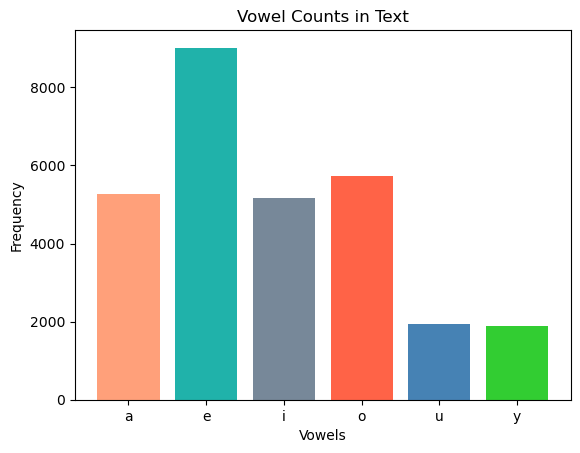

Word length distribution: Counter({'>6': 6914, '3': 3792, '4': 3513, '5': 2058, '6': 1279})


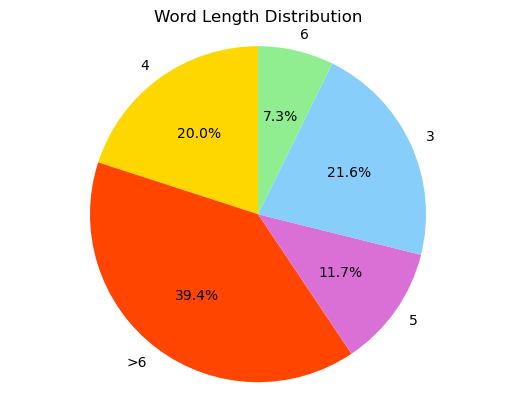

In [39]:
# Function to load the text file
# This function takes the file path as input, opens the file in read mode, and returns the text content
def load_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Function to calculate basic statistics
# This function calculates the total number of characters, words, and sentences in the text
def basic_statistics(text):
    num_characters = len(text)  # Count the number of characters
    num_words = len(text.split())  # Split the text by spaces to get words and count them
    # Count the number of sentences by looking for '.', '!', and '?' punctuation marks
    num_sentences = text.count('.') + text.count('!') + text.count('?')
    return num_characters, num_words, num_sentences

# Function to count vowels
# This function counts the frequency of vowels (including 'y') in the text
def count_vowels(text):
    vowels = 'aeiouy'  # Define vowels to be counted
    text_lower = text.lower()  # Convert text to lowercase to ensure case insensitivity
    # Return a dictionary with vowels as keys and their counts as values
    return {vowel: text_lower.count(vowel) for vowel in vowels}

# Function to count word lengths
# This function calculates the frequency of different word lengths (3, 4, 5, 6, and >6) in the text
def count_word_lengths(text):
    words = text.split()  # Split the text into individual words
    # Strip punctuation from each word and count its length
    word_lengths = [len(word.strip(string.punctuation)) for word in words]
    length_counter = Counter()  # Use a Counter to track the word length frequencies
    # Count words of lengths 3, 4, 5, 6, and >6
    for length in word_lengths:
        if length == 3:
            length_counter['3'] += 1
        elif length == 4:
            length_counter['4'] += 1
        elif length == 5:
            length_counter['5'] += 1
        elif length == 6:
            length_counter['6'] += 1
        else:
            length_counter['>6'] += 1
    return length_counter

# Function to plot vowel counts in a bar chart
# This function visualizes the frequency of vowels in the text using a bar chart
def plot_vowel_count(vowel_count):
    colors = ['#FFA07A', '#20B2AA', '#778899', '#FF6347', '#4682B4', '#32CD32']  
    plt.bar(vowel_count.keys(), vowel_count.values(), color=colors) 
    plt.title("Vowel Counts in Text", fontsize=12) 
    plt.xlabel("Vowels", fontsize=10)  
    plt.ylabel("Frequency", fontsize=10)  
    plt.show()

# Function to plot word length distribution in a pie chart
# This function visualizes the distribution of word lengths in the text using a pie chart
def plot_word_length_distribution(word_length_count):
    labels = word_length_count.keys()  
    sizes = word_length_count.values()  # Sizes of each pie chart segment (frequency)
    colors = ['#FFD700', '#FF4500', '#DA70D6', '#87CEFA', '#90EE90']  # Subtle, different colors for segments
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)  # Simple color scheme and percentages
    plt.title("Word Length Distribution", fontsize=12)  # Simplified title
    plt.axis('equal')  # Ensure the pie chart is circular
    plt.show()

# Loaded the text file 'Geetanjali by Tagore.txt'
text = load_text_file('Geetanjali by Tagore.txt')

# Part A: Calculate basic statistics (number of characters, words, and sentences) and print the results
num_characters, num_words, num_sentences = basic_statistics(text)
print(f"Number of characters: {num_characters}")
print(f"Number of words: {num_words}")
print(f"Number of sentences: {num_sentences}")

# Part B: Count vowels in the text and print the results, then plot a bar chart of vowel frequencies
vowel_count = count_vowels(text)
print("Vowel counts:", vowel_count)
plot_vowel_count(vowel_count)  # Here we will plot the vowel counts

# Part C: Count word lengths in the text and print the distribution, then plot a pie chart of word length distribution
word_length_count = count_word_lengths(text)
print("Word length distribution:", word_length_count)
plot_word_length_distribution(word_length_count)  # Here we will plot the word length distribution
